jupyter nbconvert Introduction_to_Scikit-Learn.ipynb --to slides --post serve

# Intodution to Scikit-learn in a regression problem


# Scikit-learn
**Machine Learning in Python**
- Simple and efficient tools for data mining and data analysis
- Accessible to everybody, and reusable in various contexts
- Built on NumPy, SciPy, and matplotlib
- Open source, commercially usable - BSD license

## General schema

&nbsp;


<img src='../img/machine-learning-example.png' width=500>
<center>REF: https://medium.com/@tekaround/train-validation-test-set-in-machine-learning-how-to-understand-6cdd98d4a764</center>

##  Main design
Scikit-Learn's API is a remarkably well designed. These are the main design principles:

- **Consistency**: All objects share a consistent and simple interface:
    - **Estimators**: any object that can learn some parameters based on a dataset is called an estimator (fit() method)
    - **Transformers**: some estimator can transform a dataset using learned parameters (transform() or fit_transform() method)
    - **Predictors**: some estimator can make prediction given a new instance of a dataset (predict() method + score() method)

- **Inspection**
    - All the estimetor's hyperparameters are accessible directly via public instance variable
    - All the estimator's learned parameters are accesible via public instance variables with a "_" suffix

- **Nonproliferation of clases**
    - Dataset are repesented as Numpy or Scipy sparse matrices
    - Hyperparameters are represented as simple string or python number

- **Composition**:
    - It's easy create a Pipeline estimator to build an arbitrary sequence of transformers followed a final estimator.

- **Sensible defaults hyperparameters**
    - Scikit-Learn provide a reasonable defaults values, making easy to create a baseline estimator.

## Examples

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import set_config
set_config(display='diagram')  

### Estimator - Transformer

In [2]:
from sklearn.impute import SimpleImputer

In [3]:
X_train = np.asarray([0, 2, None, 2,], dtype='float').reshape(-1,1)
X_test = np.asarray([1, None,], dtype='float').reshape(-1,1)

In [4]:
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(X_train)

SimpleImputer(strategy='most_frequent')

In [5]:
imputer.transform(X_test)

array([[1.],
       [2.]])

In [6]:
imputer.strategy, imputer.statistics_

('most_frequent', array([2.]))

### Estimator - Predictor

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
# y = -x + 3
X_train = np.array([0, 1, 2]).reshape(-1,1)
y_train = np.array([3, 2, 1]).reshape(-1,1)

In [9]:
lr_model = LinearRegression(fit_intercept=True)
lr_model.fit(X_train, y_train)

LinearRegression()

In [10]:
X_test = np.array([1.5, 2.5]).reshape(-1,1)
y_test = np.array([1.5, 0.5]).reshape(-1,1)

In [11]:
lr_model.predict(X_test)

array([[1.5],
       [0.5]])

In [12]:
lr_model.fit_intercept, lr_model.coef_, lr_model.intercept_

(True, array([[-1.]]), array([3.]))

In [13]:
# R^2 score
lr_model.score(X_test, y_test)

1.0

### Nonproliferation of clases 


In [14]:
lr_model.predict([[0]])

array([[3.]])

In [15]:
type(lr_model.predict([[0]]))

numpy.ndarray

In [16]:
from scipy.sparse import csc_matrix
sparse = csc_matrix([[0], [0], [1]], dtype='float')
sparse

<3x1 sparse matrix of type '<class 'numpy.float64'>'
	with 1 stored elements in Compressed Sparse Column format>

In [17]:
lr_model.predict(sparse)

array([[3.],
       [3.],
       [2.]])

In [18]:
#lr_model.predict([0])

### Composition

In [19]:
from sklearn.pipeline import Pipeline

In [20]:
X_train = np.array([0, 1, 2, 2, None], dtype='float').reshape(-1,1)
y_train = np.array([3, 2, 1, 1, 1], dtype='float').reshape(-1,1)

In [21]:
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('linear_regresor', LinearRegression(fit_intercept=True))], )
pipeline

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('linear_regresor', LinearRegression())])

In [22]:
pipeline.fit(X_train, y_train);

In [23]:
X_test = np.asarray([None, 2.5], dtype='float').reshape(-1,1)
y_test = np.asarray([1.0, 0.5], dtype='float').reshape(-1,1)

In [24]:
pipeline.predict(X_test)

array([[1. ],
       [0.5]])

In [25]:
pipeline['imputer'].statistics_

array([2.])

In [26]:
pipeline['imputer'].strategy

'most_frequent'

In [27]:
pipeline['linear_regresor'].coef_

array([[-1.]])

In [28]:
pipeline['linear_regresor'].intercept_

array([3.])

In [29]:
pipeline.get_params()

{'memory': None,
 'steps': [('imputer', SimpleImputer(strategy='most_frequent')),
  ('linear_regresor', LinearRegression())],
 'verbose': False,
 'imputer': SimpleImputer(strategy='most_frequent'),
 'linear_regresor': LinearRegression(),
 'imputer__add_indicator': False,
 'imputer__copy': True,
 'imputer__fill_value': None,
 'imputer__missing_values': nan,
 'imputer__strategy': 'most_frequent',
 'imputer__verbose': 0,
 'linear_regresor__copy_X': True,
 'linear_regresor__fit_intercept': True,
 'linear_regresor__n_jobs': None,
 'linear_regresor__normalize': False}

### Sensible defaults hyperparameters

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [31]:
X, y = make_regression(n_features=4, n_informative=2,
                       random_state=0, shuffle=False)

In [32]:
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X, y)

RandomForestRegressor()

## Save and load

In [33]:
import joblib

file_joblib = '../models/lr_model.joblib'

joblib.dump(lr_model, file_joblib) 
lr_model = joblib.load(file_joblib) 

lr_model.predict([[1]])

array([[2.]])

# Real regression problem
- Montevideo Housing Prices Dataset
    - Other public dataset: [Properati](https://www.properati.com.ar/data)

In [34]:
# Get dataset
dataset_cat = '../data/ready/properties.csv'

properties = pd.read_csv(dataset_cat)
properties = properties[properties['price'] < 8e5]
properties.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21095 entries, 0 to 21723
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             21095 non-null  int64  
 1   bathrooms        21095 non-null  int64  
 2   bedrooms         21095 non-null  int64  
 3   garage           21095 non-null  int64  
 4   servide_fees     21095 non-null  int64  
 5   surface_balcony  21095 non-null  float64
 6   surface_covered  21095 non-null  float64
 7   floor_special    21095 non-null  int64  
 8   floor            21095 non-null  int64  
 9   price            21095 non-null  int64  
 10  facilities       21095 non-null  int64  
 11  near_river       21095 non-null  bool   
 12  m2_index         21095 non-null  float64
 13  is_house         21095 non-null  int64  
 14  barbecue         21095 non-null  bool   
 15  decade           21095 non-null  int64  
 16  zone             21042 non-null  object 
 17  orientation 

In [35]:
properties.head()

,year,bathrooms,bedrooms,garage,servide_fees,surface_balcony,surface_covered,floor_special,floor,price,facilities,near_river,m2_index,is_house,barbecue,decade,zone,orientation,state
0,2016,2,2,1,12500,13.0,84.0,0,1,325000,0,False,1.000000,0,True,2010,carrasco,F,FR
2,1950,3,3,2,0,0.0,142.0,0,1,440000,0,False,1.000000,0,False,1950,carrasco,NaN,GE
4,1950,3,3,2,31000,0.0,270.0,0,1,600000,0,False,1.000000,0,False,1950,la caleta,NaN,GE
5,1965,2,3,0,7500,0.0,93.0,0,1,98000,0,True,1.000000,0,False,1960,centro,F,GE
6,2003,3,3,0,0,0.0,159.0,0,1,377000,0,False,1.709677,1,False,2000,pocitos,F,EE


In [76]:
import json 

In [79]:
with open('/home/cesar/tt.json', 'w') as f:
    json.dump(properties.apply(lambda x:[x.unique()]).to_json(), f)

In [36]:
from sklearn.model_selection import train_test_split

# split dataset in train and test
X_train, X_test, y_train, y_test = train_test_split(properties.drop('price', axis=1),
                                                    properties['price'],
                                                    test_size=0.2,
                                                    random_state=0
                                                   )

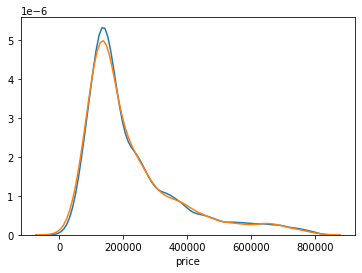

In [37]:
f, ax = plt.subplots(1)
sns.distplot(y_train, bins=100, hist=False, ax=ax);
sns.distplot(y_test, bins=100, hist=False, ax=ax);

In [38]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [39]:
drop_features = [
    'year',
]
numeric_features = [
    'bathrooms', 
    'bedrooms',
    'garage',
    'servide_fees',
    'surface_balcony',
    'surface_covered',
    'floor',
    'm2_index',
    'decade',
]
binary_features = [
    'floor_special',
    'facilities',
    'near_river',
    'is_house',
    'barbecue',
]
categorical_features = [
    'zone',
    'orientation',
    'state',
]

## Preprocesing features

In [40]:
numeric_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()),
    ])

categorical_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(categories='auto', handle_unknown='ignore')),
    ])

In [41]:
preprocessor_num = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('passthrough', 'passthrough', binary_features),
        ('drop', 'drop', drop_features + categorical_features),
    ],
    n_jobs=-1)

preprocessor_cat = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('passthrough', 'passthrough', binary_features),
        ('drop', 'drop', drop_features),
    ],
    n_jobs=-1)

In [42]:
preprocessor_num.fit_transform(X_train)

array([[-0.8082290262701954, -1.9981988716030301, -0.7392092614893319,
        ..., False, 0, False],
       [-0.8082290262701954, -1.9981988716030301, -0.7392092614893319,
        ..., False, 0, False],
       [1.8940340836527005, 0.6847909038045498, -0.7392092614893319, ...,
        False, 0, False],
       ...,
       [-0.8082290262701954, -1.1038689464671703, -0.7392092614893319,
        ..., False, 0, False],
       [-0.8082290262701954, -1.9981988716030301, -0.7392092614893319,
        ..., False, 0, False],
       [-0.8082290262701954, -0.2095390213313102, -0.7392092614893319,
        ..., False, 0, False]], dtype=object)

In [43]:
preprocessor_cat.fit_transform(X_train)

<16876x114 sparse matrix of type '<class 'numpy.float64'>'
	with 216439 stored elements in Compressed Sparse Row format>

## Models

In [44]:
from sklearn.metrics import mean_squared_error, r2_score

def measure_performance(y_real, y_pred):
    rmse = np.sqrt(mean_squared_error(y_real, y_pred))
    r2 = r2_score(y_real, y_pred)
    return 'RMSE={:.1f}, R2={:.3f}'.format(rmse, r2)

def plot_error(y_real, y_pred):
    f, ax = plt.subplots(1)
    ax.scatter(y_real, y_pred, alpha=0.4)
    ax.plot(ax.get_xbound(), ax.get_xbound(), '--k')
    ax.set(ylabel='Predicted values',
           xlabel='True values',
           title='test v/s predict price')
    return f, ax

### Linear model 

In [45]:
from sklearn.linear_model import LinearRegression
# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
lrp = Pipeline(steps=[('preprocessor', preprocessor_num),
                      ('linear_regressor', LinearRegression(fit_intercept=True))])
lrp

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['bathrooms', 'bedrooms',
                                                   'garage', 'servide_fees',
                                                   'surface_balcony',
                                                   'surface_covered', 'floor',
                                                   'm2_index', 'decade']),
                                                 ('passthrough', 'passthrough',
                                                  ['floor_special',
                                                   'facilities', 'near_river',
                                                   'is_house', 'barbecue']),
                                                 ('drop', 'drop',
                                                  ['year', 'zone',
                                                   'orientation', 'state'])])),
                ('linear_regressor', LinearRegression())])

In [46]:
lrp.fit(X_train, y_train);

In [47]:
y_pred_test = lrp.predict(X_test)
y_pred_train = lrp.predict(X_train)

In [48]:
print(measure_performance(y_test, y_pred_test) + ' -> Generalization error')
print(measure_performance(y_train, y_pred_train) + ' -> Train error')

RMSE=81811.4, R2=0.697 -> Generalization error
RMSE=81808.4, R2=0.704 -> Train error


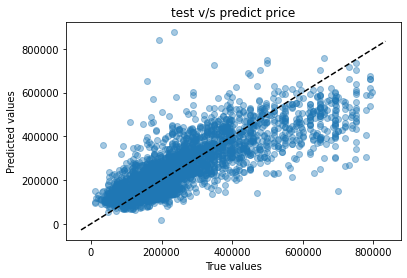

In [49]:
plot_error(y_test, y_pred_test);

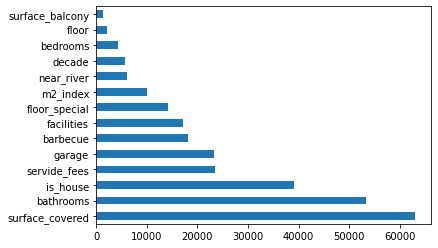

In [50]:
#feature importances
weight = pd.Series(lrp['linear_regressor'].coef_, index=numeric_features+binary_features)
feature_importances = weight.apply(np.abs).sort_values(ascending=False)
feature_importances.plot(kind='barh')

### Ensamble model

In [51]:
from sklearn.ensemble import RandomForestRegressor

In [52]:
rfp = Pipeline(steps=[('preprocessor', preprocessor_num),
                      ('rf_regressor', RandomForestRegressor(n_estimators=100,
                                                             min_samples_leaf=5,
                                                             n_jobs=-1))])
rfp

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['bathrooms', 'bedrooms',
                                                   'garage', 'servide_fees',
                                                   'surface_balcony',
                                                   'surface_covered', 'floor',
                                                   'm2_index', 'decade']),
                                                 ('passthrough', 'passthrough',
                                                  ['floor_special',
                                                   'facilities', 'near_river',
                                                   'is_house', 'barbecue']),
                                                 ('drop', 'drop',
                                                  ['year', 'zone',
                                                   'orientation', 'state'])])),
                ('rf_regressor',
                 RandomForestRegressor(min_samples_leaf=5, n_jobs=-1))])

In [53]:
rfp.fit(X_train, y_train);

In [54]:
y_pred_test = rfp.predict(X_test)
y_pred_train = rfp.predict(X_train)

In [55]:
print(measure_performance(y_test, y_pred_test) + ' -> Generalization error')
print(measure_performance(y_train, y_pred_train) + ' -> Train error')

RMSE=68427.9, R2=0.788 -> Generalization error
RMSE=52549.5, R2=0.878 -> Train error


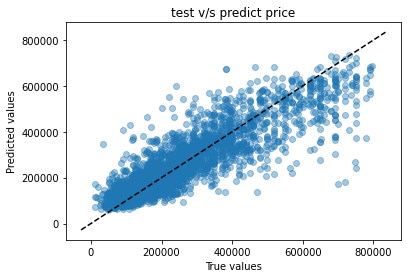

In [56]:
plot_error(y_test, y_pred_test);

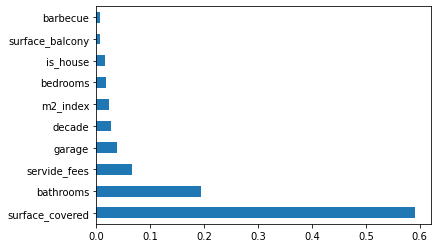

In [57]:
cat_name = (
    rfp['preprocessor'].transformers[0][2]
    + rfp['preprocessor'].transformers_[1][2]
)

feature_importances = pd.Series(data=rfp['rf_regressor'].feature_importances_,
                                index=cat_name).sort_values(ascending=False)
feature_importances[:10].plot(kind='barh')

### Add more features (caterorical)

In [58]:
rfp_cat = Pipeline(steps=[('preprocessor', preprocessor_cat),
                          ('rf_regressor', RandomForestRegressor(n_estimators=100,
                                                                 min_samples_leaf=5,
                                                                 n_jobs=-1))])
rfp_cat

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['bathrooms', 'bedrooms',
                                                   'garage', 'servide_fees',
                                                   'surface_balcony',
                                                   'surface_covered', 'floor',
                                                   'm2_index', 'decade']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['zone', 'orientation',
                                                   'state']),
                                                 ('passthrough', 'passthrough',
                                                  ['floor_special',
                                                   'facilities', 'near_river',
                                                   'is_house', 'barbecue']),
                                                 ('drop', 'drop', ['year'])])),
                ('rf_regressor',
                 RandomForestRegressor(min_samples_leaf=5, n_jobs=-1))])

In [59]:
rfp_cat.fit(X_train, y_train);

In [60]:
y_pred_test = rfp_cat.predict(X_test)
y_pred_train = rfp_cat.predict(X_train)

In [61]:
print(measure_performance(y_test, y_pred_test) + ' -> Generalization error')
print(measure_performance(y_train, y_pred_train) + ' -> Train error')

RMSE=60415.5, R2=0.835 -> Generalization error
RMSE=44081.9, R2=0.914 -> Train error


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fbcbad9ef10>)

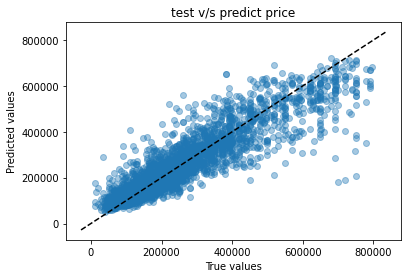

In [62]:
# Generalization error
plot_error(y_test, y_pred_test)

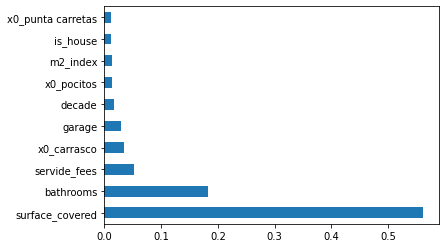

In [63]:
# Feature importances
cat_name = (
    rfp_cat['preprocessor'].transformers_[0][2]
    + list(rfp_cat['preprocessor'].named_transformers_['cat']['onehot'].get_feature_names())
    + rfp_cat['preprocessor'].transformers_[2][2]
)

feature_importances = pd.Series(data=rfp_cat['rf_regressor'].feature_importances_,
                                index=cat_name).sort_values(ascending=False)
feature_importances[:10].plot(kind='barh')

In [67]:
path_rfc_model = '../models/rfc_model.joblib'
joblib.dump(rfp_cat, path_rfc_model) 


['../models/rfc_model.joblib']

# Custom Transformers

In [64]:
from sklearn.base import BaseEstimator, TransformerMixin

class CustomStdScaler(BaseEstimator, TransformerMixin):

    def __init__(self):
        self.mean_ = None
        self.std_ = None
    
    def fit(self, X, y=None):
        if isinstance(X, pd.DataFrame):
            self.mean_ = X.mean().to_numpy()[None, :]
            self.std_ = X.std().to_numpy()[None, :]
        else:
            self.mean_ = X.mean(axis=0)[None, :]
            self.std_ = X.std(axis=0)[None, :]
        
        return self
    
    def transform(self, X, y=None):
        return (X - self.mean_)/self.std_


In [65]:
std_scaler = CustomStdScaler()
custom_dataset = std_scaler.fit_transform(X_train[numeric_features].to_numpy())
custom_dataset

array([[-0.80822903, -1.99819887, -0.73920926, ..., -0.39382037,
         0.25451126, -0.73573313],
       [-0.80822903, -1.99819887, -0.73920926, ..., -0.39382037,
        -1.07866   , -0.73573313],
       [ 1.89403408,  0.6847909 , -0.73920926, ..., -0.39382037,
         0.25451126,  0.36927434],
       ...,
       [-0.80822903, -1.10386895, -0.73920926, ...,  1.49481635,
         0.25451126,  1.47428182],
       [-0.80822903, -1.99819887, -0.73920926, ..., -0.39382037,
         0.25451126,  0.36927434],
       [-0.80822903, -0.20953902, -0.73920926, ..., -0.39382037,
         0.25451126,  1.47428182]])

# Next steps
- Cross validation (for small datasets)
- Hyperparameter tunning - Fine tunning
- Feature selection

# References
- Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow. (2019) Aurélien Géron
- [API design for machine learning software:
experiences from the scikit-learn project](https://arxiv.org/pdf/1309.0238.pdf)

- [Scikit-Learn documenetation](https://scikit-learn.org/stable/documentation.html)